# Lab 02.b - Week 3 - Solutions
## Early Fire Detection with Convolutional Neural Network

## **Challenge 01**

First, we'll load the saved NumPy array data from the last lab and redefine our auxiliary functions.

Please complete the sections  indicated with `TODO X `comments.

In [1]:
import os

if(not os.path.exists('processed_data')):
    !mkdir -p processed_data
    !unzip processed_data.zip -d processed_data


In [2]:
import os
import numpy as np
# TODO 01  - Load the data from LAB 01

# ----------answer-----------------------
save_path = 'processed_data'
X = np.load(os.path.join(save_path, 'X.npy')  )
X_test = np.load(os.path.join(save_path, 'X_test.npy') )
y = np.load(os.path.join(save_path, 'y.npy')  )
y_test = np.load(os.path.join(save_path, 'y_test.npy') )
# ---------------------------------

In [3]:
import matplotlib.pyplot as plt

#TODO 02 - Define our function to Plot the trainig accuracy and Loss


# ----------answer-----------------------
def Plot_acc_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(len(loss))

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()
# ---------------------------------

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
#TODO 03 - Complete the function to calculate and display the classification metrics and the confusion matrix for the model's predictions.

# ----------answer-----------------------

def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)

  # Define class labels
  class_labels = ['Fire', 'Non_Fire']

  # Create a DataFrame
  cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

  plt.figure(figsize=(8,6))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title('Confusion Matrix')
  plt.show()
# ---------------------------------


In [5]:
# TODO 04 - Define our image viewing function.


# ----------answer-----------------------
reverse_label_map = {
    0:"Fire",1:"Non_Fire"
}
def view_grid_figures(predictions):
  combined_list = list(zip(X_test, predictions))
  Samples = random.sample(combined_list, 16)

  total_images = 16
  grid_size = (4,4)

  fig, axes = plt.subplots(grid_size[0], grid_size[1])
  axes = axes.flatten()

  for idx in range(total_images):
      ax = axes[idx]
      ax.axis('off')


      img = Samples[idx][0]
      label = Samples[idx][1]
      ax.imshow(img)

      ax.set_title(reverse_label_map[label], fontsize=10)

  plt.tight_layout()
  plt.show()
  # ---------------------------------

## **Challenge 02**


Can we enhance the performance by using a Convolutional Neural Network (CNN), which is well-suited for image data?

In [6]:
#TODO 01 - Let’s build our CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


# ----------answer-----------------------
input_shape = X.shape[1:]

model = Sequential([
    Input(input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')  # Use a single output neuron with a sigmoid activation function for binary classification in the CNN model.
])


# ---------------------------------
# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        76,833 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,729 (303.63 KB)

 Trainable params: 77,729 (303.63 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#TODO 02 - Let’s compile our CNN model.

# ----------answer-----------------------
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

In [8]:
import time
start_time = time.time()


#TODO 03 - Let’s train our CNN model.



# ----------answer-----------------------
history = model.fit(
    X, y,
    epochs=30,
    batch_size=32,
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1,
)

end_time = time.time()
training_time = end_time - start_time

print("Training Time (s): ", training_time)

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8191 - loss: 0.4062 - val_accuracy: 0.9120 - val_loss: 0.2156
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9326 - loss: 0.1861 - val_accuracy: 0.9156 - val_loss: 0.1981
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9434 - loss: 0.1528 - val_accuracy: 0.9310 - val_loss: 0.1903
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9388 - loss: 0.1544 - val_accuracy: 0.9287 - val_loss: 0.1671
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9591 - loss: 0.1121 - val_accuracy: 0.9001 - val_loss: 0.2310
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9620 - loss: 0.1006 - val_accuracy: 0.9215 - val_loss: 0.1749
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9782 - loss: 0.0713 - val_accuracy: 0.9298 - val_loss: 0.1588
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9778 - loss: 0.0686 - val_accu

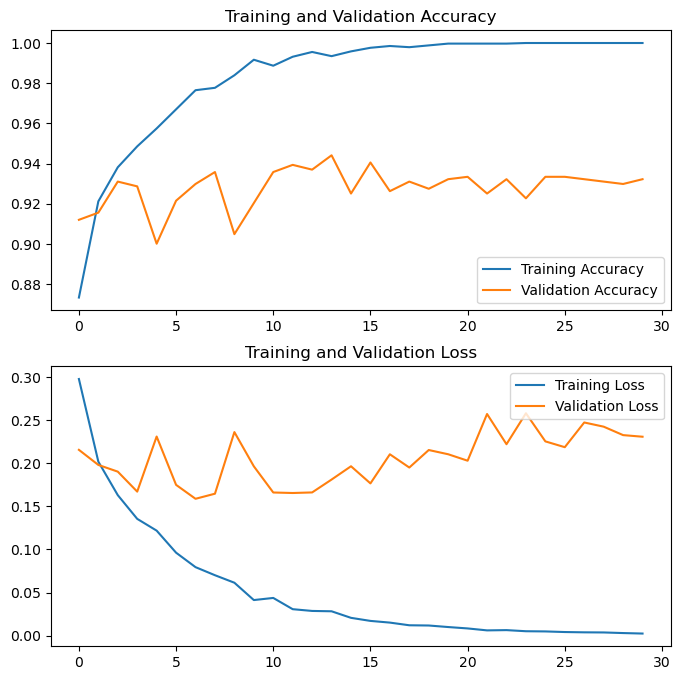

In [9]:
#TODO 04 - Evaluate the accuracy and loss graphs to analyse the model’s training progress and identify potential overfitting or underfitting.


# ----------answer-----------------------
Plot_acc_loss(history)

In [10]:

#TODO 05 - Evaluate the classification report.



# ----------answer-----------------------
from sklearn.metrics import classification_report

pred = model.predict(X_test)
binary_predictions = [1 if p > 0.5 else 0 for p in pred]


print(classification_report(y_test, binary_predictions))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.89      0.67      0.76        24

    accuracy                           0.80        49
   macro avg       0.82      0.79      0.79        49
weighted avg       0.81      0.80      0.79        49



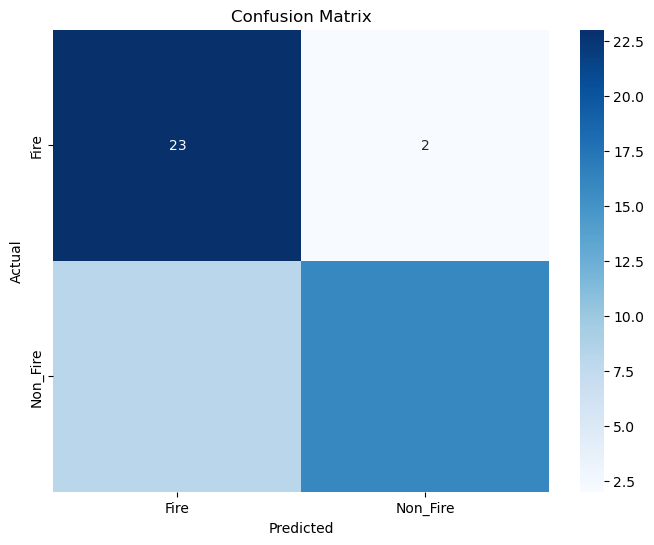

In [11]:
#TODO 05 - Plot the confusion matrix to visualise the distribution of correct and incorrect predictions.



# ----------answer-----------------------
plot_confusion_matrix(y_test, binary_predictions)

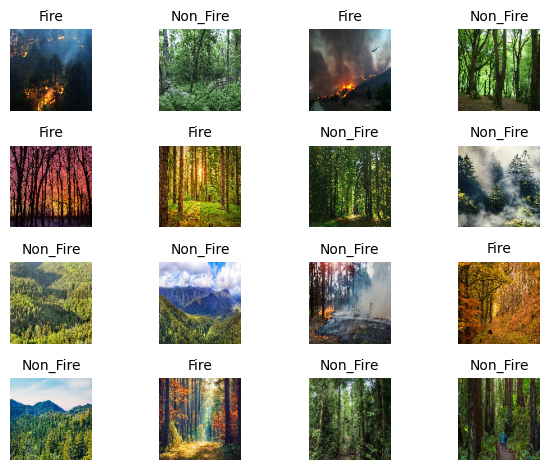

In [12]:
#TODO 05 - Plot the images along with their true and predicted labels to visually assess the model's performance.



# ----------answer-----------------------
import random
view_grid_figures(binary_predictions)

Analysing Model Inference Time

In [13]:
inference_times = []

# Perform inference and record times
for i in range(len(X_test)):
    start_time = time.time()
    _ = model.predict(np.array([X_test[i,:,:,:]]), verbose=0)
    end_time = time.time()
    inference_times.append(end_time - start_time)

# Calculate average and standard deviation
avg_time = np.mean(inference_times)
std_time = np.std(inference_times)

print(f"Training Time: {training_time} s")
print(f'Average Inference Time over {len(X_test)} runs: {avg_time*1000:.2f} ms')
print(f'Standard Deviation: {std_time*1000:.2f} ms')

Training Time: 41.307425022125244 s
Average Inference Time over 49 runs: 15.95 ms
Standard Deviation: 1.90 ms


### Did the model improve? Can you improve it further?

## **Challenge 06**
### Use the learnt techniques to create a new model that outperforms the prior ones.

*Tip Try combining both models.

Test different parameters.

Try adding more convolutional blocks.